# Deep Reinforcement Learning on the Stock Market (BASIC TASK)

  A basic Q-learning algorithm for stock market trading using Yahoo Finance data. This task will involve creating a trading environment, defining policies, implementing the Q-learning algorithm, running the algorithm, evaluating its performance, tuning parameters, and rerunning with tuned parameters.

# 1. Setting Up the Environment
Importing all the  necessary libraries:

In [ ]:
!pip install numpy pandas yfinance matplotlib scikit-learn


# 2. Data Collection
We will use yfinance to collect historical stock data from Yahoo Finance. Let's choose a stock, e.g., Apple Inc. (AAPL), for this task.

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Apple Inc.
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
data = data[['Close']]  # Use only the closing price for simplicity
data.reset_index(inplace=True)


[*********************100%%**********************]  1 of 1 completed


# 3. Creating the Trading Environment
Define the trading environment with states, actions, and rewards

In [ ]:
import numpy as np

class TradingEnv:
    def __init__(self, data, initial_balance=10000):
        self.data = data
        self.initial_balance = initial_balance
        self.reset()

    def reset(self):
        self.balance = self.initial_balance
        self.stock_held = 0
        self.current_step = 0
        self.done = False
        return self._get_state()

    def _get_state(self):
        return [self.balance, self.stock_held, self.data.iloc[self.current_step]['Close']]

    def step(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        self.current_step += 1

        if action == 0:  # Hold
            reward = 0
        elif action == 1:  # Buy
            if self.balance >= current_price:
                self.stock_held += 1
                self.balance -= current_price
                reward = 0
            else:
                reward = -1  # Penalty for trying to buy without enough balance
        elif action == 2:  # Sell
            if self.stock_held > 0:
                self.stock_held -= 1
                self.balance += current_price
                reward = current_price - self.data.iloc[self.current_step-1]['Close']  # Reward is profit from the sale
            else:
                reward = -1  # Penalty for trying to sell without holding any stock

        if self.current_step >= len(self.data) - 1:
            self.done = True

        next_state = self._get_state()
        return next_state, reward, self.done

env = TradingEnv(data)


# 4. Defining Policies
For simplicity, we will define a random policy to start with.

In [ ]:
def random_policy(state):
    return np.random.choice([0, 1, 2])  # Hold, Buy, Sell


# 5. Q-Learning Algorithm
Implement the Q-learning algorithm.

In [ ]:
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.01, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((tuple(state), action), 0.0)

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = [self.get_q_value(state, action) for action in range(self.action_size)]
        return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, done):
        current_q = self.get_q_value(state, action)
        max_next_q = max([self.get_q_value(next_state, a) for a in range(self.action_size)])
        target_q = reward + self.discount_factor * max_next_q * (1 - done)
        self.q_table[(tuple(state), action)] = current_q + self.learning_rate * (target_q - current_q)

        if done and self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

agent = QLearningAgent(state_size=3, action_size=3)


# 6. Running the Algorithm
Train the agent over multiple episodes.

In [ ]:
num_episodes = 100

for e in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while not env.done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print(f"Episode {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")


Episode 1/100, Total Reward: -41.0, Epsilon: 0.99
Episode 2/100, Total Reward: -30.0, Epsilon: 0.99
Episode 3/100, Total Reward: -17.0, Epsilon: 0.99
Episode 4/100, Total Reward: -16.0, Epsilon: 0.98
Episode 5/100, Total Reward: -19.0, Epsilon: 0.98
Episode 6/100, Total Reward: -29.0, Epsilon: 0.97
Episode 7/100, Total Reward: -12.0, Epsilon: 0.97
Episode 8/100, Total Reward: 0.0, Epsilon: 0.96
Episode 9/100, Total Reward: -9.0, Epsilon: 0.96
Episode 10/100, Total Reward: -7.0, Epsilon: 0.95
Episode 11/100, Total Reward: -12.0, Epsilon: 0.95
Episode 12/100, Total Reward: -5.0, Epsilon: 0.94
Episode 13/100, Total Reward: -5.0, Epsilon: 0.94
Episode 14/100, Total Reward: -17.0, Epsilon: 0.93
Episode 15/100, Total Reward: -27.0, Epsilon: 0.93
Episode 16/100, Total Reward: -17.0, Epsilon: 0.92
Episode 17/100, Total Reward: -32.0, Epsilon: 0.92
Episode 18/100, Total Reward: -8.0, Epsilon: 0.91
Episode 19/100, Total Reward: -42.0, Epsilon: 0.91
Episode 20/100, Total Reward: -16.0, Epsilon: 0

#7. Performance Representation
Evaluate the trained agent and plot its performance.

Evaluation Episode 1/10, Total Reward: -11.0
Evaluation Episode 2/10, Total Reward: -17.0
Evaluation Episode 3/10, Total Reward: -9.0
Evaluation Episode 4/10, Total Reward: -10.0
Evaluation Episode 5/10, Total Reward: -17.0
Evaluation Episode 6/10, Total Reward: -3.0
Evaluation Episode 7/10, Total Reward: -13.0
Evaluation Episode 8/10, Total Reward: -6.0
Evaluation Episode 9/10, Total Reward: -24.0
Evaluation Episode 10/10, Total Reward: -5.0


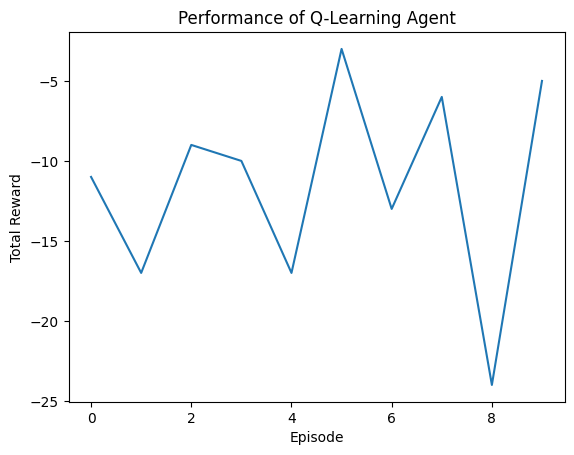

In [ ]:
import matplotlib.pyplot as plt

def evaluate_agent(agent, env, num_episodes=10):
    total_rewards = []

    for e in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while not env.done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward

        total_rewards.append(total_reward)
        print(f"Evaluation Episode {e+1}/{num_episodes}, Total Reward: {total_reward}")

    return total_rewards

rewards = evaluate_agent(agent, env)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Performance of Q-Learning Agent')
plt.show()


#8. Parameter Tuning
Experiment with different parameters to improve performance.

In [ ]:

tuned_agent = QLearningAgent(state_size=3, action_size=3, learning_rate=0.001, epsilon_decay=0.99)
# Repeat the training process with tuned_agent...
# ... (training code as above) ...

# Evaluate and plot as before with the tuned agent


#9. Rerun with Tuned Parameters
After tuning, rerun the algorithm and plot results.

Evaluation Episode 1/10, Total Reward: -15.0
Evaluation Episode 2/10, Total Reward: -37.0
Evaluation Episode 3/10, Total Reward: -19.0
Evaluation Episode 4/10, Total Reward: -13.0
Evaluation Episode 5/10, Total Reward: -17.0
Evaluation Episode 6/10, Total Reward: -31.0
Evaluation Episode 7/10, Total Reward: -19.0
Evaluation Episode 8/10, Total Reward: -22.0
Evaluation Episode 9/10, Total Reward: -44.0
Evaluation Episode 10/10, Total Reward: -30.0


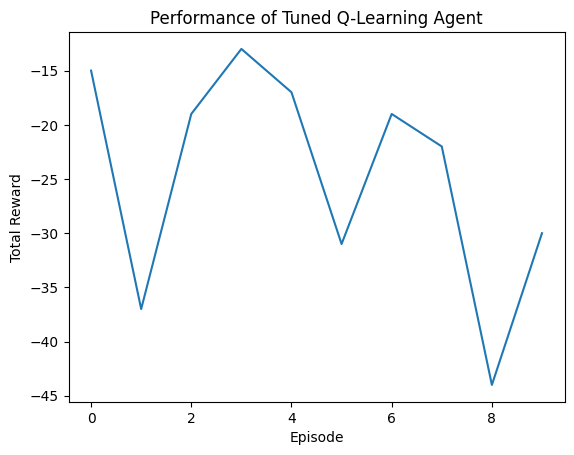

In [ ]:
# Train and evaluate the tuned agent, then plot the results
tuned_rewards = evaluate_agent(tuned_agent, env)
plt.plot(tuned_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Performance of Tuned Q-Learning Agent')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Episode 1/100, Total Reward: -16.0, Epsilon: 0.99
Episode 2/100, Total Reward: -5.0, Epsilon: 0.99
Episode 3/100, Total Reward: -17.0, Epsilon: 0.99
Episode 4/100, Total Reward: -18.0, Epsilon: 0.98
Episode 5/100, Total Reward: -14.0, Epsilon: 0.98
Episode 6/100, Total Reward: -25.0, Epsilon: 0.97
Episode 7/100, Total Reward: -48.0, Epsilon: 0.97
Episode 8/100, Total Reward: -4.0, Epsilon: 0.96
Episode 9/100, Total Reward: -37.0, Epsilon: 0.96
Episode 10/100, Total Reward: -46.0, Epsilon: 0.95
Episode 11/100, Total Reward: -10.0, Epsilon: 0.95
Episode 12/100, Total Reward: -19.0, Epsilon: 0.94
Episode 13/100, Total Reward: -26.0, Epsilon: 0.94
Episode 14/100, Total Reward: -2.0, Epsilon: 0.93
Episode 15/100, Total Reward: -18.0, Epsilon: 0.93
Episode 16/100, Total Reward: -28.0, Epsilon: 0.92
Episode 17/100, Total Reward: -23.0, Epsilon: 0.92
Episode 18/100, Total Reward: -36.0, Epsilon: 0.91
Episode 19/100, Total Reward: -17.0, Epsilon: 0.91
Episode 20/100, Total Reward: -5.0, Epsilon

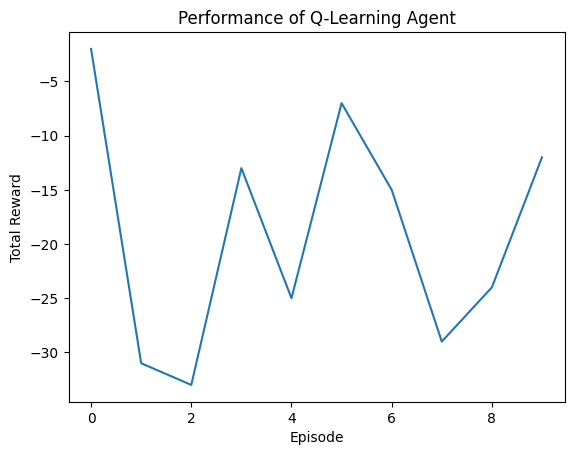

Episode 1/100, Total Reward: -2.0, Epsilon: 0.99
Episode 2/100, Total Reward: -32.0, Epsilon: 0.98
Episode 3/100, Total Reward: -42.0, Epsilon: 0.97
Episode 4/100, Total Reward: -2.0, Epsilon: 0.96
Episode 5/100, Total Reward: -16.0, Epsilon: 0.95
Episode 6/100, Total Reward: -48.0, Epsilon: 0.94
Episode 7/100, Total Reward: -10.0, Epsilon: 0.93
Episode 8/100, Total Reward: -10.0, Epsilon: 0.92
Episode 9/100, Total Reward: -6.0, Epsilon: 0.91
Episode 10/100, Total Reward: -47.0, Epsilon: 0.90
Episode 11/100, Total Reward: -4.0, Epsilon: 0.90
Episode 12/100, Total Reward: -8.0, Epsilon: 0.89
Episode 13/100, Total Reward: -33.0, Epsilon: 0.88
Episode 14/100, Total Reward: -20.0, Epsilon: 0.87
Episode 15/100, Total Reward: -20.0, Epsilon: 0.86
Episode 16/100, Total Reward: -23.0, Epsilon: 0.85
Episode 17/100, Total Reward: -8.0, Epsilon: 0.84
Episode 18/100, Total Reward: -39.0, Epsilon: 0.83
Episode 19/100, Total Reward: -2.0, Epsilon: 0.83
Episode 20/100, Total Reward: -1.0, Epsilon: 0.

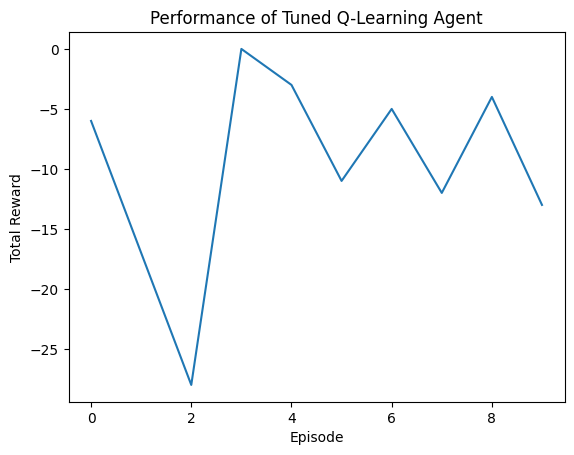

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for Apple Inc.
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
data = data[['Close']]  # Use only the closing price for simplicity
data.reset_index(inplace=True)

class TradingEnv:
    def __init__(self, data, initial_balance=10000):
        self.data = data
        self.initial_balance = initial_balance
        self.reset()

    def reset(self):
        self.balance = self.initial_balance
        self.stock_held = 0
        self.current_step = 0
        self.done = False
        return self._get_state()

    def _get_state(self):
        return [self.balance, self.stock_held, self.data.iloc[self.current_step]['Close']]

    def step(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        self.current_step += 1

        if action == 0:  # Hold
            reward = 0
        elif action == 1:  # Buy
            if self.balance >= current_price:
                self.stock_held += 1
                self.balance -= current_price
                reward = 0
            else:
                reward = -1  # Penalty for trying to buy without enough balance
        elif action == 2:  # Sell
            if self.stock_held > 0:
                self.stock_held -= 1
                self.balance += current_price
                reward = current_price - self.data.iloc[self.current_step-1]['Close']  # Reward is profit from the sale
            else:
                reward = -1  # Penalty for trying to sell without holding any stock

        if self.current_step >= len(self.data) - 1:
            self.done = True

        next_state = self._get_state()
        return next_state, reward, self.done

env = TradingEnv(data)

class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.01, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((tuple(state), action), 0.0)

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = [self.get_q_value(state, action) for action in range(self.action_size)]
        return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, done):
        current_q = self.get_q_value(state, action)
        max_next_q = max([self.get_q_value(next_state, a) for a in range(self.action_size)])
        target_q = reward + self.discount_factor * max_next_q * (1 - done)
        self.q_table[(tuple(state), action)] = current_q + self.learning_rate * (target_q - current_q)

        if done and self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

agent = QLearningAgent(state_size=3, action_size=3)

num_episodes = 100

for e in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while not env.done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print(f"Episode {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

def evaluate_agent(agent, env, num_episodes=10):
    total_rewards = []

    for e in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while not env.done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward

        total_rewards.append(total_reward)
        print(f"Evaluation Episode {e+1}/{num_episodes}, Total Reward: {total_reward}")

    return total_rewards

rewards = evaluate_agent(agent, env)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Performance of Q-Learning Agent')
plt.show()

tuned_agent = QLearningAgent(state_size=3, action_size=3, learning_rate=0.001, epsilon_decay=0.99)
for e in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while not env.done:
        action = tuned_agent.choose_action(state)
        next_state, reward, done = env.step(action)
        tuned_agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print(f"Episode {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {tuned_agent.epsilon:.2f}")

tuned_rewards = evaluate_agent(tuned_agent, env)
plt.plot(tuned_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Performance of Tuned Q-Learning Agent')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Episode 1/100, Total Reward: -10.0, Epsilon: 0.99
Episode 2/100, Total Reward: -36.0, Epsilon: 0.99
Episode 3/100, Total Reward: -3.0, Epsilon: 0.99
Episode 4/100, Total Reward: -12.0, Epsilon: 0.98
Episode 5/100, Total Reward: -39.0, Epsilon: 0.98
Episode 6/100, Total Reward: -35.0, Epsilon: 0.97
Episode 7/100, Total Reward: -24.0, Epsilon: 0.97
Episode 8/100, Total Reward: -12.0, Epsilon: 0.96
Episode 9/100, Total Reward: -7.0, Epsilon: 0.96
Episode 10/100, Total Reward: -21.0, Epsilon: 0.95
Episode 11/100, Total Reward: 0.0, Epsilon: 0.95
Episode 12/100, Total Reward: -54.0, Epsilon: 0.94
Episode 13/100, Total Reward: -39.0, Epsilon: 0.94
Episode 14/100, Total Reward: -19.0, Epsilon: 0.93
Episode 15/100, Total Reward: -14.0, Epsilon: 0.93
Episode 16/100, Total Reward: -7.0, Epsilon: 0.92
Episode 17/100, Total Reward: -34.0, Epsilon: 0.92
Episode 18/100, Total Reward: -9.0, Epsilon: 0.91
Episode 19/100, Total Reward: -38.0, Epsilon: 0.91
Episode 20/100, Total Reward: -39.0, Epsilon: 

<ipython-input-14-270c3131faa4>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r', num_episodes)


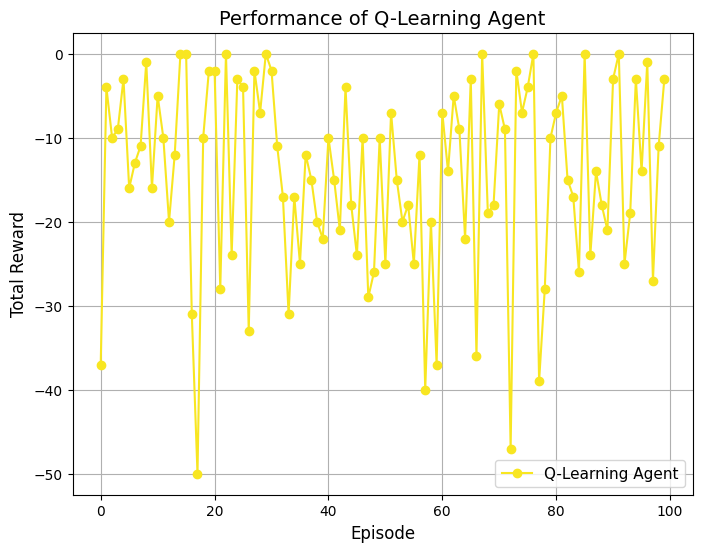

Episode 1/100, Total Reward: -5.0, Epsilon: 0.99
Episode 2/100, Total Reward: -43.0, Epsilon: 0.98
Episode 3/100, Total Reward: -10.0, Epsilon: 0.97
Episode 4/100, Total Reward: -10.0, Epsilon: 0.96
Episode 5/100, Total Reward: -7.0, Epsilon: 0.95
Episode 6/100, Total Reward: -9.0, Epsilon: 0.94
Episode 7/100, Total Reward: -1.0, Epsilon: 0.93
Episode 8/100, Total Reward: -39.0, Epsilon: 0.92
Episode 9/100, Total Reward: -32.0, Epsilon: 0.91
Episode 10/100, Total Reward: -12.0, Epsilon: 0.90
Episode 11/100, Total Reward: -39.0, Epsilon: 0.90
Episode 12/100, Total Reward: -15.0, Epsilon: 0.89
Episode 13/100, Total Reward: -8.0, Epsilon: 0.88
Episode 14/100, Total Reward: -16.0, Epsilon: 0.87
Episode 15/100, Total Reward: -27.0, Epsilon: 0.86
Episode 16/100, Total Reward: -13.0, Epsilon: 0.85
Episode 17/100, Total Reward: -23.0, Epsilon: 0.84
Episode 18/100, Total Reward: -12.0, Epsilon: 0.83
Episode 19/100, Total Reward: -12.0, Epsilon: 0.83
Episode 20/100, Total Reward: -1.0, Epsilon: 

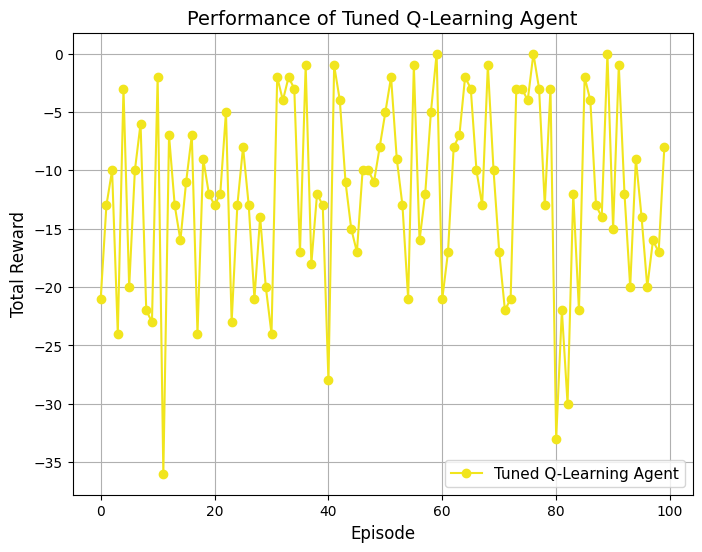

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for Apple Inc.
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
data = data[['Close']]  # Use only the closing price for simplicity
data.reset_index(inplace=True)

class TradingEnv:
    def __init__(self, data, initial_balance=10000):
        self.data = data
        self.initial_balance = initial_balance
        self.reset()

    def reset(self):
        self.balance = self.initial_balance
        self.stock_held = 0
        self.current_step = 0
        self.done = False
        return self._get_state()

    def _get_state(self):
        return [self.balance, self.stock_held, self.data.iloc[self.current_step]['Close']]

    def step(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        self.current_step += 1

        if action == 0:  # Hold
            reward = 0
        elif action == 1:  # Buy
            if self.balance >= current_price:
                self.stock_held += 1
                self.balance -= current_price
                reward = 0
            else:
                reward = -1  # Penalty for trying to buy without enough balance
        elif action == 2:  # Sell
            if self.stock_held > 0:
                self.stock_held -= 1
                self.balance += current_price
                reward = current_price - self.data.iloc[self.current_step-1]['Close']  # Reward is profit from the sale
            else:
                reward = -1  # Penalty for trying to sell without holding any stock

        if self.current_step >= len(self.data) - 1:
            self.done = True

        next_state = self._get_state()
        return next_state, reward, self.done

env = TradingEnv(data)

class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.01, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((tuple(state), action), 0.0)

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = [self.get_q_value(state, action) for action in range(self.action_size)]
        return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, done):
        current_q = self.get_q_value(state, action)
        max_next_q = max([self.get_q_value(next_state, a) for a in range(self.action_size)])
        target_q = reward + self.discount_factor * max_next_q * (1 - done)
        self.q_table[(tuple(state), action)] = current_q + self.learning_rate * (target_q - current_q)

        if done and self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

agent = QLearningAgent(state_size=3, action_size=3)

num_episodes = 100

for e in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while not env.done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print(f"Episode {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

def evaluate_agent(agent, env, num_episodes=100):
    total_rewards = []

    for e in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while not env.done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward

        total_rewards.append(total_reward)
        print(f"Evaluation Episode {e+1}/{num_episodes}, Total Reward: {total_reward}")

    return total_rewards

rewards = evaluate_agent(agent, env)

# Enhanced plot for Q-Learning Agent
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.cm.get_cmap('viridis_r', num_episodes)
gamma = np.arange(0, num_episodes)

ax.plot(gamma, rewards, '-o', color=cmap(1), label="Q-Learning Agent")
ax.set_xlabel('Episode', fontsize=12)
ax.set_ylabel('Total Reward', fontsize=12)
ax.set_title('Performance of Q-Learning Agent', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True)

plt.show()

# Tuning the agent
tuned_agent = QLearningAgent(state_size=3, action_size=3, learning_rate=0.001, epsilon_decay=0.99)
for e in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while not env.done:
        action = tuned_agent.choose_action(state)
        next_state, reward, done = env.step(action)
        tuned_agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    print(f"Episode {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {tuned_agent.epsilon:.2f}")

tuned_rewards = evaluate_agent(tuned_agent, env)

# Enhanced plot for Tuned Q-Learning Agent
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gamma, tuned_rewards, '-o', color=cmap(2), label="Tuned Q-Learning Agent")
ax.set_xlabel('Episode', fontsize=12)
ax.set_ylabel('Total Reward', fontsize=12)
ax.set_title('Performance of Tuned Q-Learning Agent', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True)

plt.show()
